In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 13.4 MB/s eta 0:00:00


In [ ]:
import PyPDF2  # ✅ Attention à la casse : PyPDF2, pas PyPdf2
import nltk
import re

def load_text(filepath):
    text = ""

    # Ouvre le fichier PDF en lecture binaire
    with open(filepath, "rb") as file:
        reader = PyPDF2.PdfReader(file)  # ✅ PdfReader, pas .load

        # Itère sur chaque page et ajoute son texte
        for page in reader.pages:
            text += page.extract_text()

    return text


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')  # Tu as oublié cette ligne

ALLOWED_INSIDE_TOKENS = r'+#\.\-/'
stop_words = set(stopwords.words('english'))

def clean_text(text: str) -> str:
    """
    Nettoyage léger :
    - Minuscule
    - Garde les chiffres
    - Garde les caractères utiles (+ # . - /)
    - Supprime le reste de la ponctuation
    - Supprime les stopwords
    """
    # 1. Minuscule
    text = text.lower()

    # 2. Sauts de ligne/tab → espace
    text = re.sub(r'[\r\n\t]', ' ', text)

    # 3. Supprimer les caractères non autorisés
    text = re.sub(fr'[^\w{ALLOWED_INSIDE_TOKENS}\s]', ' ', text)

    # 4. Tokenisation
    tokens = nltk.word_tokenize(text)

    # 5. Enlève les mots trop courts (< 2) OU dans stopwords
    tokens = [tok for tok in tokens if tok not in stop_words]

    return ' '.join(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
txt = "we search for a Python developer with skills in Python, Keras, Flask, and Machine Learning"
print(clean_text(txt))


search python developer skills python keras flask machine learning


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def compute_similarity(cv_text, jd_text):
    # Nettoyage avancé
    cv_clean = clean_text(cv_text)
    jd_clean = clean_text(jd_text)

    # TF-IDF avec bigrams
    vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
    vectors = vectorizer.fit_transform([jd_clean, cv_clean])

    # Similarité cosinus
    score = cosine_similarity(vectors[0], vectors[1])[0][0]

    return score


In [ ]:
cv_text = "python developer with 5 year experience, in Keras and Flask."
jd_text = "we search for a Python developer with skills in Python, Keras, Flask, and Machine Learning."
print("Score :", compute_similarity(cv_text, jd_text))


Score : 0.3276230465377655


In [ ]:
#Low Score of TF-IDF is because it does not understand meaning and only focuses on word frequency. Even if skills match TF-IDF would not recognize synonyms

In [ ]:
!pip install -U sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from sentence_transformers import SentenceTransformer, util
def compute_sbert_similarity(cv_text, jd_text):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    resume_embeddings = model.encode(cv_text, convert_to_tensor=True)
    jd_embedding = model.encode(jd_text, convert_to_tensor=True)

    similarity_scores = util.pytorch_cos_sim(resume_embeddings, jd_embedding)
    return similarity_scores.flatten().tolist()[0]

In [ ]:
#util.pytorch_cos_sim is a function from the sentence-transformers library that computes cosine similarity between batches of PyTorch tensors, often embeddings from models like SBERT.
# It supports GPU acceleration, making it efficient for deep learning workflows involving large batches of vector comparisons.
# In contrast, cosine_similarity from scikit-learn operates on NumPy arrays and runs on the CPU only.
# It is typically used in classical machine learning tasks with smaller datasets or feature vectors.
# Both functions return a similarity matrix between two sets of vectors, but pytorch_cos_sim is optimized for PyTorch environments and GPU usage, while cosine_similarity is more general-purpose and CPU-based

In [ ]:
cv = """
Experienced Data Scientist with over 5 years in the tech industry. Proficient in Python, SQL, and R.
Skilled in data wrangling, exploratory data analysis, and machine learning model deployment using scikit-learn, TensorFlow, and PyTorch.
Led multiple end-to-end ML projects including churn prediction, fraud detection, and demand forecasting.
Worked with cloud platforms like AWS and GCP, using S3, Lambda, BigQuery, and Cloud Functions.
Developed APIs in Flask and FastAPI for serving models. Experience with Docker and Git.
Strong collaboration with cross-functional teams in Agile environments.
Master’s in Applied Data Science. Excellent communication and business understanding.
"""

jd = """
We are hiring a Data Scientist to join our advanced analytics team.
The ideal candidate has experience building machine learning models and deploying them in production environments.
Strong proficiency in Python and knowledge of data science libraries such as scikit-learn, pandas, NumPy, TensorFlow or PyTorch.
Experience working with cloud technologies like AWS or GCP is a plus.
Familiarity with model monitoring, version control (Git), and containerization tools (Docker) is required.
You will be responsible for delivering insights, creating dashboards, and collaborating with engineering teams to scale ML pipelines.
A Master’s degree in Data Science or related field is preferred.
"""
jd1 = """
We are looking for a Senior java developer with experience , skills in java , spring boot and angular
"""



score = compute_sbert_similarity(cv, jd)
print(f"SBERT Similarity Score: {score:.4f}")


SBERT Similarity Score: 0.7749


In [ ]:
# section similarity
import re
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

def extract_section(text, section_name):
    pattern = fr'{section_name}\s*[:\-]?\s*(.*?)(?=\n[A-Z][a-z]|$)'
    match = re.search(pattern, text, re.DOTALL | re.IGNORECASE)
    return match.group(1).strip() if match else ''

def section_similarity(text1, text2):
    if not text1 or not text2:
        return 0.0
    emb1 = model.encode(text1, convert_to_tensor=True)
    emb2 = model.encode(text2, convert_to_tensor=True)
    return float(util.pytorch_cos_sim(emb1, emb2)[0][0])

def extract_title(text):
    first_line = text.strip().split('\n')[0]
    return first_line.strip()

def title_similarity(cv_text, jd_text):
    cv_title = extract_title(cv_text)
    jd_title = extract_title(jd_text)
    return section_similarity(cv_title, jd_title)

def match_all(cv_text, jd_text, weights=None):
    if weights is None:
        weights = {'skills': 0.4, 'experience': 0.3, 'title': 0.3}

    cv_skills = extract_section(cv_text, 'skills')
    jd_skills = extract_section(jd_text, 'skills')

    cv_exp = extract_section(cv_text, 'experience')
    jd_exp = extract_section(jd_text, 'experience')

    skill_sim = section_similarity(cv_skills, jd_skills)
    exp_sim = section_similarity(cv_exp, jd_exp)
    title_sim = title_similarity(cv_text, jd_text)

    final_score = (
        weights['skills'] * skill_sim +
        weights['experience'] * exp_sim +
        weights['title'] * title_sim
    )

    return {
        'MatchingScore': round(final_score, 3),
        'SkillSimilarity': round(skill_sim, 3),
        'ExperienceSimilarity': round(exp_sim, 3),
        'TitleSimilarity': round(title_sim, 3)
    }


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
cv = """
Senior Python Developer
Skills: Python, Flask, AWS, TensorFlow, Docker
Experience: 4 years of experience in machine learning and deploying models with Flask and Docker on AWS.
"""

jd = """
Machine Learning Engineer
Skills: Python, TensorFlow, Docker, AWS
Experience: At least 3 years experience in ML project development and deployment.
"""

print(match_all(cv, jd))


{'MatchingScore': 0.591, 'SkillSimilarity': 0.944, 'ExperienceSimilarity': 0.422, 'TitleSimilarity': 0.291}


In [ ]:
import re
from difflib import SequenceMatcher
from sentence_transformers import SentenceTransformer, util

# Load SBERT model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Updated title groups based on your dataset
TITLE_GROUPS = {
    "Information Technology": ['information-technology', 'it', 'software engineer', 'python developer', 'backend engineer'],
    "Business Development": ['business-development', 'biz dev', 'growth manager', 'business strategist'],
    "Legal": ['advocate', 'lawyer', 'legal advisor'],
    "Culinary": ['chef', 'cook', 'head chef'],
    "Engineering": ['engineering', 'mechanical engineer', 'civil engineer', 'electrical engineer'],
    "Accounting & Finance": ['accountant', 'finance', 'financial analyst', 'auditor'],
    "Fitness & Health": ['fitness', 'healthcare', 'personal trainer', 'physiotherapist'],
    "Aviation": ['aviation', 'pilot', 'air traffic controller'],
    "Sales": ['sales', 'salesperson', 'sales executive'],
    "Banking": ['banking', 'bank officer', 'loan officer'],
    "Consulting": ['consultant', 'strategy consultant', 'business consultant'],
    "Construction": ['construction', 'builder', 'site engineer'],
    "Public Relations": ['public-relations', 'pr manager', 'communications officer'],
    "Human Resources": ['hr', 'recruiter', 'talent acquisition'],
    "Design": ['designer', 'graphic designer', 'ux', 'ui'],
    "Arts & Media": ['arts', 'digital-media', 'media specialist', 'visual artist'],
    "Education": ['teacher', 'educator', 'professor', 'trainer'],
    "Apparel": ['apparel', 'fashion designer', 'clothing'],
    "Agriculture": ['agriculture', 'farmer', 'agronomist'],
    "Automobile": ['automobile', 'car technician', 'auto engineer'],
    "BPO": ['bpo', 'call center agent', 'customer support'],
}

def normalize_title(raw_title: str) -> str:
    raw_title = raw_title.lower().strip()
    for group, aliases in TITLE_GROUPS.items():
        for alias in aliases:
            if SequenceMatcher(None, raw_title, alias).ratio() >= 0.75:
                return group
    return raw_title.title()

def title_similarity(cv_text: str, jd_text: str) -> float:
    cv_title = cv_text.strip().split('\n')[0]
    jd_title = jd_text.strip().split('\n')[0]
    norm_cv = normalize_title(cv_title)
    norm_jd = normalize_title(jd_title)
    emb_cv = model.encode(norm_cv, convert_to_tensor=True)
    emb_jd = model.encode(norm_jd, convert_to_tensor=True)
    return float(util.pytorch_cos_sim(emb_cv, emb_jd)[0][0])

def extract_section(text: str, name: str) -> str:
    pattern = fr"{name}\s*[:\-]?\s*(.*?)(?=\n[A-Z][a-z]|$)"
    match = re.search(pattern, text, re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else ""

def extract_experience_sentences(section: str) -> str:
    keywords = ("experience", "worked", "developed", "led",
                "managed", "built", "deployed", "implemented")
    sentences = re.split(r"[.\n]", section)
    return " ".join(
        s.strip() for s in sentences if any(k in s.lower() for k in keywords)
    )

def extract_years(section: str) -> int:
    years = re.findall(r"(\d+)\s*(?:\+)?\s*(?:years?|yrs?)", section.lower())
    return max([int(y) for y in years], default=0)

def sbert_similarity(a: str, b: str) -> float:
    if not a or not b:
        return 0.0
    emb_a = model.encode(a, convert_to_tensor=True)
    emb_b = model.encode(b, convert_to_tensor=True)
    return float(util.pytorch_cos_sim(emb_a, emb_b)[0][0])

def match_cv_to_jd(cv_text: str, jd_text: str, weights=None) -> dict:
    if weights is None:
        weights = {"skills": 0.4, "experience": 0.3, "title": 0.3}

    # Skills
    cv_skills = extract_section(cv_text, "Skills")
    jd_skills = extract_section(jd_text, "Skills")
    skill_sim = sbert_similarity(cv_skills, jd_skills)

    # Experience
    cv_exp = extract_section(cv_text, "Experience")
    jd_exp = extract_section(jd_text, "Experience")
    cv_exp_sent = extract_experience_sentences(cv_exp)
    jd_exp_sent = extract_experience_sentences(jd_exp)
    exp_sim = sbert_similarity(cv_exp_sent, jd_exp_sent)
    cv_years = extract_years(cv_exp)
    jd_years = extract_years(jd_exp)
    exp_gap = max(jd_years - cv_years, 0)

    # Title
    title_sim = title_similarity(cv_text, jd_text)

    # Final weighted score
    final_score = (
        weights["skills"] * skill_sim +
        weights["experience"] * exp_sim +
        weights["title"] * title_sim
    )

    return {
        "MatchingScore": round(final_score, 3),
        "SkillSimilarity": round(skill_sim, 3),
        "ExperienceSimilarity": round(exp_sim, 3),
        "TitleSimilarity": round(title_sim, 3),
        "CV_Years": cv_years,
        "JD_Years": jd_years,
        "ExperienceGap": exp_gap
    }



In [ ]:
    cv = """
    Senior Accountant
    Skills: Financial reporting, SAP, Excel, Tax Compliance
    Experience: Over 3 years of experience managing accounts, preparing audits and budgets. Worked with SAP for tax reporting.
    """

    jd = """
    Accountant
    Skills: Accounting, Tax Reporting, Financial Audits
    Experience: Candidate must have 5+ years experience in financial statements, budget preparation and using SAP.
    """

    print(match_cv_to_jd(cv, jd))

{'MatchingScore': 0.66, 'SkillSimilarity': 0.7, 'ExperienceSimilarity': 0.653, 'TitleSimilarity': 0.612, 'CV_Years': 3, 'JD_Years': 5, 'ExperienceGap': 2}


In [ ]:
import re
from difflib import SequenceMatcher
from sentence_transformers import SentenceTransformer, util
import math

model = SentenceTransformer("all-MiniLM-L6-v2")

TITLE_GROUPS = {
    "Information Technology": ['information-technology', 'it', 'software engineer', 'python developer', 'backend engineer'],
    "Business Development": ['business-development', 'biz dev', 'growth manager', 'business strategist'],
    "Legal": ['advocate', 'lawyer', 'legal advisor'],
    "Culinary": ['chef', 'cook', 'head chef'],
    "Engineering": ['engineering', 'mechanical engineer', 'civil engineer', 'electrical engineer'],
    "Accounting & Finance": ['accountant', 'finance', 'financial analyst', 'auditor'],
    "Fitness & Health": ['fitness', 'healthcare', 'personal trainer', 'physiotherapist'],
    "Aviation": ['aviation', 'pilot', 'air traffic controller'],
    "Sales": ['sales', 'salesperson', 'sales executive'],
    "Banking": ['banking', 'bank officer', 'loan officer'],
    "Consulting": ['consultant', 'strategy consultant', 'business consultant'],
    "Construction": ['construction', 'builder', 'site engineer'],
    "Public Relations": ['public-relations', 'pr manager', 'communications officer'],
    "Human Resources": ['hr', 'recruiter', 'talent acquisition'],
    "Design": ['designer', 'graphic designer', 'ux', 'ui'],
    "Arts & Media": ['arts', 'digital-media', 'media specialist', 'visual artist'],
    "Education": ['teacher', 'educator', 'professor', 'trainer'],
    "Apparel": ['apparel', 'fashion designer', 'clothing'],
    "Agriculture": ['agriculture', 'farmer', 'agronomist'],
    "Automobile": ['automobile', 'car technician', 'auto engineer'],
    "BPO": ['bpo', 'call center agent', 'customer support'],
}

def normalize_title(raw_title: str) -> str:
    raw_title = raw_title.lower().strip()
    for group, aliases in TITLE_GROUPS.items():
        for alias in aliases:
            if SequenceMatcher(None, raw_title, alias).ratio() >= 0.75:
                return group
    return raw_title.title()

def title_similarity(cv_text: str, jd_text: str) -> float:
    cv_title = cv_text.strip().split('\n')[0]
    jd_title = jd_text.strip().split('\n')[0]
    norm_cv = normalize_title(cv_title)
    norm_jd = normalize_title(jd_title)
    emb_cv = model.encode(norm_cv, convert_to_tensor=True)
    emb_jd = model.encode(norm_jd, convert_to_tensor=True)
    return float(util.pytorch_cos_sim(emb_cv, emb_jd)[0][0])

def extract_section(text: str, name: str) -> str:
    pattern = fr"{name}\s*[:\-]?\s*(.*?)(?=\n[A-Z][a-z]|$)"
    match = re.search(pattern, text, re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else ""

def extract_experience_sentences(section: str) -> str:
    keywords = ("experience", "worked", "developed", "led",
                "managed", "built", "deployed", "implemented")
    sentences = re.split(r"[.\n]", section)
    return " ".join(
        s.strip() for s in sentences if any(k in s.lower() for k in keywords)
    )

def extract_years(section: str) -> int:
    years = re.findall(r"(\d+)\s*(?:\+)?\s*(?:years?|yrs?)", section.lower())
    return max([int(y) for y in years], default=0)

def sbert_similarity(a: str, b: str) -> float:
    if not a or not b:
        return 0.0
    emb_a = model.encode(a, convert_to_tensor=True)
    emb_b = model.encode(b, convert_to_tensor=True)
    return float(util.pytorch_cos_sim(emb_a, emb_b)[0][0])

def compute_sbert_similarity(cv_text: str, jd_text: str) -> float:
    return sbert_similarity(cv_text, jd_text)

def penalize_exp_gap(score: float, exp_gap: int) -> float:
    # Penalization factor (exponential decay)
    penalty = math.exp(-0.2 * exp_gap)
    return score * penalty

def match_cv_to_jd(cv_text: str, jd_text: str) -> dict:
    # Weights according to your request
    weights = {
        "full_text": 0.4,
        "skills": 0.15,
        "experience": 0.15,
        "title": 0.3
    }

    cv_skills = extract_section(cv_text, "Skills")
    jd_skills = extract_section(jd_text, "Skills")
    skill_sim = sbert_similarity(cv_skills, jd_skills)

    cv_exp = extract_section(cv_text, "Experience")
    jd_exp = extract_section(jd_text, "Experience")
    cv_exp_sent = extract_experience_sentences(cv_exp)
    jd_exp_sent = extract_experience_sentences(jd_exp)
    exp_sim = sbert_similarity(cv_exp_sent, jd_exp_sent)

    cv_years = extract_years(cv_exp)
    jd_years = extract_years(jd_exp)
    exp_gap = max(jd_years - cv_years, 0)

    title_sim = title_similarity(cv_text, jd_text)

    full_text_sim = compute_sbert_similarity(cv_text, jd_text)

    raw_score = (
        weights["full_text"] * full_text_sim +
        weights["skills"] * skill_sim +
        weights["experience"] * exp_sim +
        weights["title"] * title_sim
    )

    final_score = penalize_exp_gap(raw_score, exp_gap)

    return {
        "MatchingScoreRaw": round(raw_score, 3),
        "MatchingScorePenalized": round(final_score, 3),
        "FullTextSimilarity": round(full_text_sim, 3),
        "SkillSimilarity": round(skill_sim, 3),
        "ExperienceSimilarity": round(exp_sim, 3),
        "TitleSimilarity": round(title_sim, 3),
        "CV_Years": cv_years,
        "JD_Years": jd_years,
        "ExperienceGap": exp_gap
    }



In [ ]:
    cv = """
    Senior Accountant
    Skills: Financial reporting, SAP, Excel, Tax Compliance
    Experience: Over 3 years of experience managing accounts, preparing audits and budgets. Worked with SAP for tax reporting.
    """

    jd = """
    Accountant
    Skills: Accounting, Tax Reporting, Financial Audits
    Experience: Candidate must have 5+ years experience in financial statements, budget preparation and using SAP.
    """

    print(match_cv_to_jd(cv, jd))


{'MatchingScoreRaw': 0.718, 'MatchingScorePenalized': 0.481, 'FullTextSimilarity': 0.827, 'SkillSimilarity': 0.7, 'ExperienceSimilarity': 0.653, 'TitleSimilarity': 0.612, 'CV_Years': 3, 'JD_Years': 5, 'ExperienceGap': 2}


In [ ]:
!pip install streamlit
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que match_cv_to_jd(cv_text, jd_text) est ta fonction de matching

def batch_match(cvs, jds):
    # cvs et jds sont des listes de strings
    results = []
    for i, cv in enumerate(cvs):
        for j, jd in enumerate(jds):
            scores = match_cv_to_jd(cv, jd)
            results.append({
                "CV_Index": i,
                "JD_Index": j,
                "MatchingScorePenalized": scores["MatchingScorePenalized"] # Changed 'Score' to 'MatchingScorePenalized'
            })
    return pd.DataFrame(results)

st.title("Batch CV - JD Matching")

uploaded_cv = st.file_uploader("Upload CSV with CV texts", type=["csv"])
uploaded_jd = st.file_uploader("Upload CSV with Job Descriptions", type=["csv"])

if uploaded_cv and uploaded_jd:
    df_cv = pd.read_csv(uploaded_cv)
    df_jd = pd.read_csv(uploaded_jd)

    # Supposons que la colonne texte s'appelle 'text'
    cvs = df_cv['text'].tolist()
    jds = df_jd['text'].tolist()

    df_scores = batch_match(cvs, jds)

    st.subheader("Matching Scores Table")
    st.dataframe(df_scores)

    # Pivot pour heatmap : CV en ligne, JD en colonne
    heatmap_data = df_scores.pivot(index='CV_Index', columns='JD_Index', values='MatchingScorePenalized')

    st.subheader("Matching Scores Heatmap")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", ax=ax)
    st.pyplot(fig)

2025-06-28 22:10:17.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 22:10:17.067 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 22:10:17.068 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 22:10:17.070 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 22:10:17.070 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 22:10:17.071 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 22:10:17.072 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 22:10:17.076 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

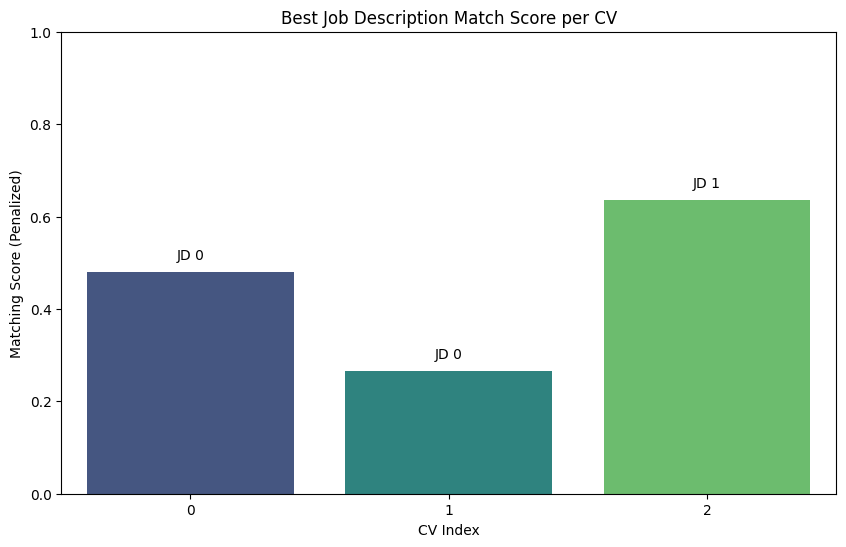

In [ ]:
# --- TEST DATA ---

cvs = [
    """Senior Accountant
Skills: Financial reporting, SAP, Excel, Tax Compliance
Experience: Over 3 years of experience managing accounts, preparing audits and budgets. Worked with SAP for tax reporting.""",
    """Data Scientist
Skills: Python, SQL, Machine Learning, TensorFlow, PyTorch
Experience: 5+ years developing machine learning models and data pipelines in cloud environments.""",
    """Java Developer
Skills: Java, Spring Boot, Angular
Experience: 4 years experience in enterprise web applications and microservices."""
]

jds = [
    """Accountant
Skills: Accounting, Tax Reporting, Financial Audits
Experience: Candidate must have 5+ years experience in financial statements, budget preparation and using SAP.""",
    """Senior Java Developer
Skills: Java, Spring Boot, Angular, Microservices
Experience: Minimum 5 years experience in Java development, especially with Spring Boot."""
]
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer pour chaque CV le JD avec le meilleur score
best_matches = df_scores.loc[df_scores.groupby('CV_Index')['MatchingScorePenalized'].idxmax()]

plt.figure(figsize=(10, 6))
sns.barplot(x='CV_Index', y='MatchingScorePenalized', data=best_matches, palette="viridis")

# Ajouter l'annotation du JD correspondant sur chaque barre
for idx, row in best_matches.iterrows():
    plt.text(row['CV_Index'], row['MatchingScorePenalized'] + 0.02, f"JD {int(row['JD_Index'])}",
             ha='center', va='bottom', fontsize=10, color='black')

plt.title("Best Job Description Match Score per CV")
plt.xlabel("CV Index")
plt.ylabel("Matching Score (Penalized)")
plt.ylim(0, 1)
plt.show()


In [3]:
!jupyter nbconvert --to notebook --inplace \
  --ClearOutputPreprocessor.enabled=True \
  --ClearMetadataPreprocessor.enabled=True \
  votre_notebook.ipynb


[NbConvertApp] WARNING | pattern 'votre_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
